<a href="https://colab.research.google.com/github/SteWaite/FrogChallenge/blob/main/Frog_Spawn_increased_granularity_v3_hype_hype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystac
!pip install fsspec
!pip install xarray[complete]
!pip install aiohttp
!pip install zarr
!pip install netCDF4 
!pip install pystac_client
!pip install rioxarray
!pip install planetary_computer
!pip install optuna 
!pip install catboost
!pip install pytorch_tabnet
!pip install country-bounding-boxes

In [ ]:
#Importing the necessary libraries

import optuna
import zarr
import requests
import aiohttp
import pandas as pd
import pystac
import fsspec
import xarray as xr
import datetime 
import numpy as np
import math
from tqdm import tqdm
from datetime import date
import pystac
import itertools
import scipy
from pystac_client import Client
import rioxarray
import planetary_computer as pc
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import r2_score
from lightgbm.sklearn import LGBMRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from sklearn.linear_model import LogisticRegression, Lasso
from xgboost import XGBRegressor, DMatrix
from google.colab import drive
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.metrics import Metric
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn.functional as F
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
import os
from pathlib import Path
import pandas as pd
import numpy as np
# example of a stacked model for binary classification
from numpy import hstack
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import collections

from tensorflow.keras.optimizers.schedules import ExponentialDecay

from keras.wrappers.scikit_learn import KerasRegressor

from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.layers import Input, BatchNormalization, Reshape, Conv1D, MaxPooling1D, Flatten, GaussianNoise
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")
from country_bounding_boxes import (
      country_subunits_containing_point,
      country_subunits_by_iso_code
    )

In [ ]:

class FrogRegion():

  def __init__(self, country: str):

    self.country = country
    if self.country not in ['aus', 'sa', 'cr']:
      raise TypeError('Country not in data')
        

    if self.country == 'aus':

      self.frog_data = self.aus_frog()
      self.co_ords = {'max_lati': -10.521216,
                          'max_longi': 153.896484,
                          'min_lati': -43.69331,
                          'min_longi': 113.062499}

    elif self.country == 'sa':

      self.frog_data = self.sa_frog()
      self.co_ords = {"min_lati":  -34.9661,
                       "max_lati":  -22.1462890625	,
                       "min_longi": 16.4735213,
                       "max_longi": 32.8861328125} 

    
 	                    

    else:
      self.frog_data = self.cr_frog()     
      self.co_ords = {   'min_lati':    8.07065429687,
                         'min_longi' :-85.9080078125	,
                         'max_lati' : 11.189453125,
                         'max_longi': -82.5635742187,
                       }
  


  
  def aus_frog(self):
    path_frog_occur =pathlib.Path("/content/drive/MyDrive/Frogs/FrogChallenge/BWW Challenge 2022 Level 3 Frog_Occurence_Australia.csv")
    df_frog=pd.read_csv(path_frog_occur)
    df_frog = df_frog[['eventDate','year','month','coordinateUncertaintyInMeters','decimalLatitude','decimalLongitude','occurrenceStatus','countryCode']]
    #df_frog= df_frog[df_frog['coordinateUncertaintyInMeters'] <= 100]
    df_frog.dropna(axis=1, inplace=True)
    df_frog["eventDate"] = pd.to_datetime(df_frog["eventDate"])
    print(len(df_frog))
    return df_frog

  def sa_frog(self):
    path_frog_occur =pathlib.Path("/content/drive/MyDrive/Frogs/FrogChallenge/BWW Challenge 2022 Level 3 Frog_Occurence_South_Africa_and_Costa_Rica.csv")
    df_frog=pd.read_csv(path_frog_occur)

 
    df_frog["eventDate"] = pd.to_datetime(df_frog["eventDate"])

    df_frog = df_frog[['eventDate','year','month','coordinateUncertaintyInMeters','decimalLatitude','decimalLongitude','occurrenceStatus','countryCode']]
    df_frog = df_frog.loc[df_frog['countryCode'] == 'ZA']
    #df_frog = df_frog[df_frog['coordinateUncertaintyInMeters'] <= 500]
    df_frog.dropna(axis=1, inplace=True)
    print(len(df_frog))
    return df_frog

  def cr_frog(self):
    path_frog_occur =pathlib.Path("/content/drive/MyDrive/Frogs/FrogChallenge/BWW Challenge 2022 Level 3 Frog_Occurence_South_Africa_and_Costa_Rica.csv")
    df_frog=pd.read_csv(path_frog_occur)
    df_frog["eventDate"] = pd.to_datetime(df_frog["eventDate"])
    df_frog = df_frog[['eventDate','year','month','decimalLatitude','coordinateUncertaintyInMeters','decimalLongitude','occurrenceStatus','countryCode']]
    df_frog = df_frog.loc[df_frog['countryCode'] == 'CR']
    #df_frog = df_frog[df_frog['coordinateUncertaintyInMeters'] <= 500]
    df_frog.dropna(axis=1, inplace=True)
    print(len(df_frog))
    return df_frog



  def centroids(self):
      if self.country == 'aus':
          self.data = self.frog_data.sample(n=15000, random_state=1)
      else:
          self.data = self.frog_data

      self.data['max_lati'] = self.data['decimalLatitude'] + (0.250842/2)
      self.data['min_lati'] = self.data['decimalLatitude'] - (0.250842/2)
      self.data['max_longi'] = self.data['decimalLongitude'] + (0.272646/2)
      self.data['min_longi'] = self.data['decimalLongitude'] - (0.272646/2)
      return self.data



  def find_frogs_two(self):
    self.data = self.frog_data
    locations = self.centroids()[['max_lati', 'min_lati', 'max_longi', 'min_longi']]
    

    filt_lat = {}

    i=1

    for _, row in locations.iterrows():

      longi_lati_df_rang = self.data[((self.data['decimalLongitude'] >= row['min_longi']) &
                                      (self.data['decimalLongitude'] <= row["max_longi"])) & 
                                      ((self.data['decimalLatitude'] >= row["min_lati"]) &  
                                       (self.data['decimalLatitude'] <= row["max_lati"]))]



      
      if longi_lati_df_rang.shape[0]>0:
        filt_lat[i] ={}
        filt_lat[i]["coord"] = row
        filt_lat[i]["frog_count"] = longi_lati_df_rang.shape[0]  
        i=i+1
        
      

    self.whole_filt_cord = filt_lat
  
    self.whole_filt_cord_df = pd.DataFrame.from_dict(self.whole_filt_cord, orient="index")
    
    self.whole_filt_cord_df["min_longi"] = [i["min_longi"] for i in self.whole_filt_cord_df["coord"]]
    self.whole_filt_cord_df["min_lati"] = [i["min_lati"] for i in self.whole_filt_cord_df["coord"]]

    self.whole_filt_cord_df["max_longi"] = [i["max_longi"] for i in self.whole_filt_cord_df["coord"]]
    self.whole_filt_cord_df["max_lati"] = [i["max_lati"] for i in self.whole_filt_cord_df["coord"]]
    return self.whole_filt_cord_df
  
  def generate_submission(self):
    self.test_file =pathlib.Path("/content/drive/MyDrive/Frogs/FrogChallenge/BWW Challenge 2022 Level_3_submission_template_file.csv")
    submission_df=pd.read_csv(self.test_file)


    return submission_df
  
    
  def get_weather_data(self):

    url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/terraclimate"
    collection = pystac.read_file(url)
    asset = collection.assets["zarr-https"]
    store = fsspec.get_mapper(asset.href)
    ds = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])


    ds_date = ds.sel(time = slice("2015-11-01","2019-11-01"))

    weather_data = ds_date.where((ds.lat>=self.co_ords["min_lati"]) & (ds.lat<=self.co_ords["max_lati"]) & 
                          ((ds.lon>=self.co_ords["min_longi"] ) & (ds.lon<=self.co_ords["max_longi"])),drop = True)

    #  Converting the xarray format to pandas dataframe 
    weather_data = weather_data.to_dataframe().reset_index()


    weather_data["time"] = pd.to_datetime(weather_data["time"])


    return weather_data[['crs', 'lat', 'lon',
                         'time', 'aet', 'def', 'pdsi',
                         'pet', 'ppt', 'q', 'soil', 
                         'srad', 'tmax', 'tmin', 
                         'vap','vpd', 'ws']]


                 
  def merge_weather_data(self, train=True):

    weather_data = self.get_weather_data()
   
    self.Train = train
    
    if self.Train:
      self.whole_filt_cord_df = self.find_frogs_two()
    else:
      self.whole_filt_cord_df = self.generate_submission()
      self.whole_filt_cord_df['min_longi'] = self.whole_filt_cord_df['min_lon']
      self.whole_filt_cord_df['max_longi'] = self.whole_filt_cord_df['max_lon']
      self.whole_filt_cord_df['min_lati'] = self.whole_filt_cord_df['min_lat']
      self.whole_filt_cord_df['max_lati'] = self.whole_filt_cord_df['max_lat']



    for ind, row in tqdm(self.whole_filt_cord_df.iterrows()):
     
      longi_lati_df_rang = weather_data[(weather_data['lon'] >= row["min_longi"]) &
                                        (weather_data['lon'] <= row["max_longi"]) & 
                                        (weather_data['lat'] >= row["min_lati"]) & 
                                        (weather_data['lat'] <=row["max_lati"])]
          
      col1 = [{var+'_mean' :longi_lati_df_rang[var].mean()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]]
      col2 = [{var+'_std' :longi_lati_df_rang[var].std()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]]
      col3 = [{var+'_min' :longi_lati_df_rang[var].min()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]]
      col4 = [{var+'_var' :longi_lati_df_rang[var].var()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]]
      col5 = [{var+'_max' :longi_lati_df_rang[var].max()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]]
      col6 = [{var+'_mid' :longi_lati_df_rang[var].median()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]]
      col7 = [{var+'_sum' :longi_lati_df_rang[var].sum()} for var in longi_lati_df_rang[longi_lati_df_rang.columns[4:]]]
      
      functions = [ col1, col2, col3, col4, col5, col6, col7]
      for func in functions:
        for var in func:
          for key,val in var.items():
            self.whole_filt_cord_df.loc[ind,key] = val

      for temp in range(19, 45):
        self.whole_filt_cord_df.loc[ind,f"days at {temp}"] =  len(longi_lati_df_rang[longi_lati_df_rang['tmax'] == temp])
      self.whole_filt_cord_df.loc[ind,"samples_count"] = longi_lati_df_rang.shape[0]
    return self.whole_filt_cord_df

  def generate_data(self):

    self.training_data = self.merge_weather_data(train=True)
    

    return self.training_data
  
  def generate_sub_data(self):
      
      self.preditction_data = self.merge_weather_data(train=False)

      return self.preditction_data


    

  
      
      

        


In [ ]:
class Modelling2():

  def __init__(self, submission_data, columns,  search_model, xgparams, lgbparams, tabnetparams, aus, cr, sa):
      
      
      self.selected_model = search_model
      self.xgparams = xgparams
      self.lgbparams = lgbparams
      self.tabnetparams = tabnetparams
           
      self.aus = self.upper_limit(aus)
      self.cr = self.upper_limit(cr)
      self.sa = self.upper_limit(sa)
      #import seaborn as sns

      
      

      self.columns = columns
      self.fullX, self.fully, self.X, self.y, self.X_val, self.y_val = self.generate_dataset()
      self.submission = submission_data[self.columns].values

    
        
   
      self.model1 = XGBRegressor(**self.xgparams, objective='reg:squarederror',
              silent=True)
      self.model2 = LGBMRegressor(**self.lgbparams)
      self.model3 = Pipeline([('scaler', StandardScaler()), ('Tabnet',TabNetRegressor(**self.tabnetparams))])
      self.model4 = self.dcnn()
    
  def data_stats(self):
      print(f'The shape of X {self.X.shape}')
      print(self.X[self.X['aet_mean'].isna()])

      sns.histplot(self.y, kde=True)
  
  def upper_limit(self, data):
      data  = data[(data['frog_count'] < 40)]
      return data.fillna(0)

  def dcnn (self):

    input = Input(117)
    x = BatchNormalization()(input)
    x = Dense(4096)(x)
    x = Reshape((256, 16))(x)
    x = Conv1D(filters=16, kernel_size=7, strides=1, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.01)(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.01)(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.01)(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.01)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.01)(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)


    lr_schedule = ExponentialDecay(
        0.0001,
        decay_steps=100000,
        decay_rate=0.96,
        staircase=True)


    dcnn = Model(inputs=input,outputs=x)
    dcnn.compile(optimizer=Adam(learning_rate= lr_schedule), loss='mean_squared_error')
    return dcnn



  def generate_dataset(self):
      
      
      
      """Creating a valation set"""
      remove_columns =['coord','frog_count','min_longi','min_lati','max_longi','max_lati', 'samples_count']

      cr_X_train, cr_X_test, cr_y_train, cr_y_test = train_test_split(self.cr.drop(columns=remove_columns), self.cr['frog_count'], test_size= 0.05)
      sa_X_train, sa_X_test, sa_y_train, sa_y_test = train_test_split(self.sa.drop(columns=remove_columns), self.sa['frog_count'], test_size= 0.05)
      aus_X_train, aus_X_test, aus_y_train, aus_y_test = train_test_split(self.aus.drop(columns=remove_columns), self.aus['frog_count'], test_size= 0.05)
      
      fullX = pd.concat([self.cr.drop(columns=remove_columns), self.sa.drop(columns=remove_columns), self.aus.drop(columns=remove_columns)], axis = 0)
      fully = pd.concat([self.cr['frog_count'], self.sa['frog_count'],  self.aus['frog_count']], axis = 0)
      X = pd.concat([cr_X_train, sa_X_train, aus_X_train], axis = 0)
      y = pd.concat([cr_y_train, sa_y_train, aus_y_train], axis = 0)
      X_val = pd.concat([cr_X_test, sa_X_test, aus_X_test], axis = 0)
      y_val = pd.concat([cr_y_test, sa_y_test, aus_y_test], axis = 0)

      return fullX, fully, X, y, X_val.values, y_val.values

  def optimize(self, trial):
    self.tree_params = {
       
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'gamma':trial.suggest_loguniform('learning_rate',0.01, 10),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5 ,0.6 ,0.7 ,0.8 ,1.0]),
        'learning_rate': trial.suggest_loguniform('learning_rate',0.0001, 1),
        'n_estimators':  trial.suggest_int('n_estimators', 10, 7000),
        'max_depth':trial.suggest_int('max_depth',1, 100),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        }

    # self.tabnet_params  = {
    #     'n_d':trial.suggest_int('n_d', 8, 512),
    #     'n_a':trial.suggest_int('n_a', 8, 512),
    #     'n_steps': trial.suggest_int('n_steps', 2, 10),
    #     'n_independent': trial.suggest_int('n_independent', 1, 8),
    #     'n_shared': trial.suggest_int('n_shared', 1, 8),
    #     'gamma': 1.3,
    #     'lambda_sparse':  trial.suggest_loguniform('lambda_sparse',0.0001, 0.01),
    #     'optimizer_fn' : optim.Adam,
    #     'optimizer_params' : dict(lr = 1e-2, weight_decay = 1e-5),
    #     'mask_type' : "entmax",
    #     'scheduler_fn':ReduceLROnPlateau,
    #     'seed': 42,
    #     'output_dim' :1,
    #     'verbose':0}


    if self.selected_model == 'xgboost':
        self.opt_model = XGBRegressor(**self.tree_params, objective='reg:squarederror')
    
    elif self.selected_model == 'lgb':
        self.opt_model = LGBMRegressor(**self.tree_params)
    
    else:
        self.opt_model = Pipeline([('scaler', StandardScaler()), ('Tabnet',TabNetRegressor(**self.tabnet_params))])

    

  

    avg_accuracy = []


    # Definition of k-fold cross validation
    k_fold = KFold(n_splits=5)

    for train_index, test_index in k_fold.split(self.X, self.y):

        X_train, X_test = self.X.iloc[train_index].values, self.X.iloc[test_index].values
        y_train, y_test = self.y.iloc[train_index].values, self.y.iloc[test_index].values
        
        data = DMatrix(X_train, label=y_train)
        md = xgb.train( params=self.tree_params, dtrain=data)
        #self.opt_model.fit(X_train, y_train.reshape(-1,1))
        #y_preds = self.opt_model.predict(X_test)
        y_preds = md.predict(DMatrix(X_test))

        # Save accuracy
        avg_accuracy.append(mean_squared_error(y_test, y_preds.flatten(), squared=False))
        
        
    
    return np.mean(avg_accuracy)
  
  def dcnn_optimixe(self, study):

      input = Input(117)
      x = BatchNormalization()(input)
      x = Dense(4096)(x)
      x = Reshape((256, 16))(x)
      x = Conv1D(filters=16, kernel_size=7, strides=1, activation='relu')(x)
      x = MaxPooling1D(pool_size=2)(x)
      x = Flatten()(x)
      x = Dense(512, activation='relu')(x)
      x = BatchNormalization()(x)
      x = GaussianNoise(0.01)(x)
      x = Dropout(0.2)(x)
      x = Dense(256, activation='relu')(x)
      x = BatchNormalization()(x)
      x = GaussianNoise(0.01)(x)
      x = Dropout(0.2)(x)
      x = Dense(128, activation='relu')(x)
      x = BatchNormalization()(x)
      x = GaussianNoise(0.01)(x)
      x = Dropout(0.2)(x)
      x = Dense(64, activation='relu')(x)
      x = BatchNormalization()(x)
      x = GaussianNoise(0.01)(x)
      x = Dropout(0.2)(x)
      x = Dense(32, activation='relu')(x)
      x = BatchNormalization()(x)
      x = GaussianNoise(0.01)(x)
      x = Dropout(0.2)(x)
      x = Dense(1)(x)


  
  def run_study(self):
      study = optuna.create_study(direction='minimize')
      study.optimize(self.optimize, n_trials=10000)
      print('Number of finished trials:', len(study.trials))
      print('Best trial:', study.best_trial.params)

  def train_models(self):
    
    final_model1_acc, final_model2_acc, final_model3_acc, final_belnd_ac, final_weighted_belnd_ac, final_model4_acc, accuracy_store  = list(), list(), list(), list(), list(), list(), list()
    coefs = []
    
    
    
    skf = KFold(n_splits=5, random_state=1, shuffle=True)
    for train_index, test_index in skf.split(self.X, self.y):
        df = pd.DataFrame()
        

        X_train, X_test = self.X.iloc[train_index].values, self.X.iloc[test_index].values
        y_train, y_test = self.y.iloc[train_index].values, self.y.iloc[test_index].values
        
        
        # self.model1.fit(X_train, y_train)
        # y_preds1 = self.model1.predict(X_test)
        # acc1 = np.sqrt(mean_squared_error(y_test, y_preds1))
        # final_model1_acc.append(acc1)

        data = DMatrix(X_train, label=y_train)
        model1 = xgb.train(params=self.xgparams, dtrain=data)
        y_preds1 = model1.predict(DMatrix(X_test))
        acc1 = np.sqrt(mean_squared_error(y_test, y_preds1))
        final_model1_acc.append(acc1)

        self.model2.fit(X_train, y_train)
        y_preds2 = self.model2.predict(X_test)
        acc2 = np.sqrt(mean_squared_error(y_test, y_preds2))
        final_model2_acc.append(acc2)

        self.model3.fit(X_train, y_train.reshape(-1,1))
        y_preds3 = self.model3.predict(X_test)
        y_preds3 = y_preds3.flatten()
        acc3 = np.sqrt(mean_squared_error(y_test, y_preds3))
        final_model3_acc.append(acc3)
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        self.model4.fit(scaler.transform(X_train), y_train, epochs=500)
        y_preds4 = self.model4.predict(scaler.transform(X_test))
        acc4 = np.sqrt(mean_squared_error(y_test, y_preds4))
        final_model4_acc.append(acc4)

        blended = np.round(np.mean([model1.predict(DMatrix(X_test)),
                          self.model2.predict(X_test),
                          self.model3.predict(X_test).flatten(),
                          self.model4.predict(scaler.transform(X_test)).flatten()], axis=0))

        blended_val = np.round(np.mean([model1.predict(DMatrix(self.X_val)),
                          self.model2.predict(self.X_val),
                          self.model3.predict(self.X_val).flatten(),
                          self.model4.predict(scaler.transform(self.X_val)).flatten()], axis=0))

           
      
     
        print(f'Accuracy Percentage {accuracy_score(y_test, blended)}')
        print(f'Accuracy Percentage {accuracy_score(self.y_val, blended_val)}')

    


        blend_acc = np.sqrt(mean_squared_error(y_test, blended))
        final_belnd_ac.append(blend_acc)
        acc_percentage = accuracy_score(y_test, np.round(blended))
        accuracy_store.append(acc_percentage)

        print(f'Model one:{acc1} Model two:{acc2} Model three:{acc3} Model four:{acc4} Blend {blend_acc} accuracy percentage{accuracy_store}')
  

        
    print(f'Final Model one:{np.mean(final_model1_acc)} Model two:{np.mean(final_model2_acc)} Model three:{np.mean(final_model3_acc)} Model four:{np.mean(final_model4_acc)} Blend {np.mean(final_belnd_ac)} accuracy percentage {np.mean(accuracy_store)}')  
   
    
    #final = (self.model1.predict(self.submission) + self.model2.predict(self.submission) + self.model3.predict(self.submission))/3
   

    
    #return  np.round(final)

  def final_submission(self):
      print(self.fullX.values.shape)
      print(self.fully.values.shape)
      scaler = StandardScaler()
      scaler.fit(self.fullX.values)

      data = DMatrix(self.fullX.values, label=self.fully.values)

      xgbmod = xgb.train(params=self.xgparams, dtrain=data)
      self.model2.fit(self.fullX.values, self.fully.values)
      self.model3.fit(self.fullX.values, self.fully.values.reshape(-1,1))
      self.model4.fit(scaler.transform(self.fullX.values), self.fully.values, epochs=500)
      
      model1 = xgbmod.predict(DMatrix(self.submission))
      model2 = self.model2.predict(self.submission)
      model3 = self.model3.predict(self.submission).flatten()
      model4 = self.model4.predict(scaler.transform(self.submission)).flatten()
      output = np.round(np.mean([model1, model2, model3, model4], axis=0))

      return np.round(output) ,np.round(model1), np.round(model2),  np.round(model3),  np.round(model4)




In [ ]:
aus = FrogRegion('aus')
aus_train_data =  aus.generate_data()
aus_sub_data = aus.generate_sub_data()
aus_sub_data = aus_sub_data[aus_sub_data['samples_count'] !=0]

cr = FrogRegion('cr')
cr_train_data =  cr.generate_data()
cr_sub_data = cr.generate_sub_data()
cr_sub_data = cr_sub_data[cr_sub_data['samples_count'] !=0]

sa = FrogRegion('sa')
sa_train_data =  sa.generate_data()
sa_sub_data = sa.generate_sub_data()
sa_sub_data = sa_sub_data[sa_sub_data['samples_count'] !=0]
submission_data = pd.concat([aus_sub_data, cr_sub_data, sa_sub_data ]).fillna(0)

125621


15000it [46:47,  5.34it/s]
182it [00:32,  5.59it/s]


3229


3229it [02:28, 21.75it/s]
182it [00:08, 21.78it/s]


3441


3441it [03:58, 14.42it/s]
182it [00:12, 14.72it/s]


In [ ]:
X, y, X_val, y_val = modelling.generate_dataset()


In [ ]:
remove_columns =['coord','frog_count','min_longi',
                 'min_lati','max_longi','max_lati',
                 'samples_count']

cols =  [col for col in sa_train_data.columns if col not in remove_columns]



"""XGB Best is trial 9618 with value: 14.242464293339058."""

cr_xgboost = {'lambda': 0.0019705076897731056, 'alpha': 0.9922149594888194,
              'learning_rate': 0.4328621917902381, 'colsample_bytree': 1.0, 
              'subsample': 1.0, 'n_estimators': 3746, 'max_depth': 52,
              'random_state': 2020, 'min_child_weight': 13}

""".. Best is trial 22 with value: 6.990452761221792."""


cr_lgb = {'lambda': 0.9995343987261046, 'alpha': 0.004791665278566929,
 'learning_rate': 0.022514521197968686, 'colsample_bytree': 0.4,
 'subsample': 0.6, 'n_estimators': 5859, 'max_depth': 24, 'random_state': 2020,
 'min_child_weight': 1}



cr_tabnet =  {'n_d': 85, 'n_a': 134, 'n_steps': 2, 'n_independent': 1,
              'n_shared': 3, 'lambda_sparse': 0.001250942143850002,
               'verbose':0,
             'scheduler_params': dict(mode = "min", 
                                      patience = 300,
                                      min_lr = 1e-5, 
                                      factor = 0.9)}



modelling = Modelling2(
                          submission_data,
                          cols,
                          'xgboost',
                          cr_xgboost, 
                          cr_lgb ,
                          cr_tabnet,
                          aus_train_data,
                          cr_train_data,
                          sa_train_data)


The shape of X (8743, 117)
Empty DataFrame
Columns: [aet_mean, def_mean, pdsi_mean, pet_mean, ppt_mean, q_mean, soil_mean, srad_mean, tmax_mean, tmin_mean, vap_mean, vpd_mean, ws_mean, aet_std, def_std, pdsi_std, pet_std, ppt_std, q_std, soil_std, srad_std, tmax_std, tmin_std, vap_std, vpd_std, ws_std, aet_min, def_min, pdsi_min, pet_min, ppt_min, q_min, soil_min, srad_min, tmax_min, tmin_min, vap_min, vpd_min, ws_min, aet_var, def_var, pdsi_var, pet_var, ppt_var, q_var, soil_var, srad_var, tmax_var, tmin_var, vap_var, vpd_var, ws_var, aet_max, def_max, pdsi_max, pet_max, ppt_max, q_max, soil_max, srad_max, tmax_max, tmin_max, vap_max, vpd_max, ws_max, aet_mid, def_mid, pdsi_mid, pet_mid, ppt_mid, q_mid, soil_mid, srad_mid, tmax_mid, tmin_mid, vap_mid, vpd_mid, ws_mid, aet_sum, def_sum, pdsi_sum, pet_sum, ppt_sum, q_sum, soil_sum, srad_sum, tmax_sum, tmin_sum, vap_sum, vpd_sum, ws_sum, days at 19, days at 20, days at 21, days at 22, days at 23, days at 24, days at 25, days at 26, days 

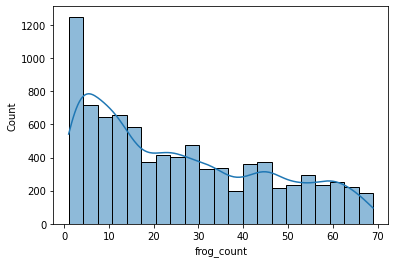

In [ ]:
modelling.data_stats()

In [ ]:
modelling.run_study()

In [ ]:
modelling.train_models()

In [ ]:
output, mod1, mod2, mod3, mod4 = modelling.final_submission()

In [ ]:
test_file =pathlib.Path("/content/drive/MyDrive/Frogs/FrogChallenge/BWW Challenge 2022 Level_3_submission_template_file.csv")
submission_df=pd.read_csv(test_file)
submission_df['Predicted_frog_count'] = mod1
submission_df.to_csv('sub25Five.csv', index=False)

3441it [04:13, 13.58it/s]
74it [00:05, 13.39it/s]


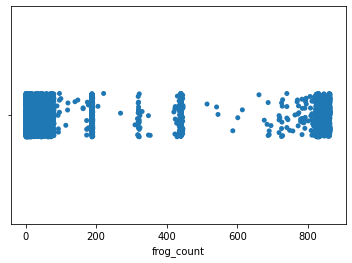

In [ ]:


sa = FrogRegion('sa')
sa_train_data, sa_predition_data =  sa.generate_data()


sns.stripplot(sa_train_data['frog_count'])

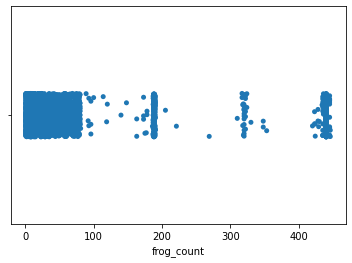

In [ ]:
""". xgboost - Best is trial 76 with value: 6.77421594873943."""
"""lgb  Best is trial . Best is trial 2338 with value: 7.0448827006928365.."""
"""tabnet  Best is trial 817 with value: 4.164947948241024."""



In [ ]:
sa_preds

In [ ]:

sns.stripplot(aus_train_data['frog_count'])

In [ ]:
aus_train_data.to_csv('/content/drive/MyDrive/Frogs/Aus_train.csv')
aus_predition_data.to_csv('/content/drive/MyDrive/Frogs/Aus_pred.csv')

In [ ]:
upper = 350
aus_train_data = aus_train_data[(aus_train_data['frog_count'] < upper)]
aus_predition_data = aus_predition_data.fillna(0)

sa_predition_data = sa_predition_data.fillna(0)
sns.stripplot(sa_train_data['frog_count'])


Final Model one:45.60561928020237 Model two:46.93841533732321 Model three:41.648743417714215 Blend 41.875934235953814


In [ ]:
full_data['Predicted_frog_count'] = full_data['Predicted_frog_count'].round()

In [ ]:
pd.set_option('display.max_rows', 500)

full_data = full_data[['Id', 'min_lon', 'min_lat', 'max_lon', 'max_lat', 'Predicted_frog_count']]

full_data.to_csv('Submission_11_gran.csv', index=False)

In [ ]:
full_data.shape


(182, 6)

In [ ]:
test_file =pathlib.Path("/content/drive/MyDrive/Frogs/FrogChallenge/BWW Challenge 2022 Level_3_submission_template_file.csv")
submission_df=pd.read_csv(test_file)
submission_df.shape

(182, 6)

In [ ]:
submission_df.merge(right= full_data, left_on = 'Id', right_on='Id', how='left')